# Team Members:

Jetendra Mulinti, Goutham Vemula, Prajeeth Nakka

Introduction: We are creating Python functions to compute classification model metrics and comparing those outcomes with pre-built functions, alongside generating graphical evaluations of model performance.

In [1]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

## Task 2: Load dataset from GitHub repository into Pandas dataframe

In [2]:
url = 'https://raw.githubusercontent.com/JetendraMulinti/DAV-6150---DataScience/main/M5%20Practical%20Challenge%20Classification%20Model%20Performance%20Metrics/M5_Data.csv'
df = pd.read_csv(url)
df.head()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


In [3]:
df['pregnant'].min(), df['pregnant'].max()

(0, 15)

## Task 3: Use Pandas' crosstab() to calculate the confusion matrix

In [4]:
confusion_matrix = pd.crosstab(df['class'], df['scored.class'], rownames=['Actual'], colnames=['Predicted'])
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 Predicted    0   1
Actual            
0          119   5
1           30  27


## Task 4: Extract confusion matrix values

In [5]:
TP = confusion_matrix[1][1]
FP = confusion_matrix[1][0]
TN = confusion_matrix[0][0]
FN = confusion_matrix[0][1]


print("TP: ", TP)
print("FP: ", FP)
print("TN: ", TN)
print("FN: ", FN)

TP:  27
FP:  5
TN:  119
FN:  30


In [6]:
###### Validating the the confusion matrix values manually

print("Count of rows where actual & predicted are 1 (TP): ",len(df[(df['class'] == 1) & (df['scored.class'] == 1)]))
print("Count of rows where actual = 0 & predicted = 1 (FP): ",len(df[(df['class'] == 0) & (df['scored.class'] == 1)]))
print("Count of rows where actual & predicted are 0 (TN): ",len(df[(df['class'] == 0) & (df['scored.class'] == 0)]))
print("Count of rows where actual = 1 & predicted = 0 (FN): ",len(df[(df['class'] == 0) & (df['scored.class'] == 1)]))

Count of rows where actual & predicted are 1 (TP):  27
Count of rows where actual = 0 & predicted = 1 (FP):  5
Count of rows where actual & predicted are 0 (TN):  119
Count of rows where actual = 1 & predicted = 0 (FN):  5


## Task 5: Function to calculate accuracy 
Tells us total correct values %

In [7]:
def calculate_accuracy(actual, predicted):
    correct = (actual == predicted).sum()
    total = len(actual)
    accuracy = correct / total
    return accuracy

## Task 6: Function to calculate precision 
Tells us quality of positive predictions

Imp for use-cases like: Email Spam Detection & Financial Fraud Detection and so on.. 

In [8]:
def calculate_precision(TP, FP):
    precision = TP / (TP + FP)
    return precision

## Task 7: Function to calculate sensitivity (recall) 
ability to detect positive instances, crucial for cases where missing positives could have serious implications.

Imp for use-cases like: Disease Screening & Criminal Investigations and so on..

In [9]:
def calculate_sensitivity(TP, FN):
    sensitivity = TP / (TP + FN)
    return sensitivity

## Task 8: Function to calculate specificity 
identify negative instances, important in contexts where false alarms are to be minimized.

Imp for use-cases like: Drug Testing

In [10]:
def calculate_specificity(TN, FP):
    specificity = TN / (TN + FP)
    return specificity

# Task 9: Function to calculate F1 Score
Balances precision and recall, useful for comparing models that have similar accuracies but differ in their precision and recall values.

Imp for use-cases like Customer Churn Prediction

In [11]:
def calculate_f1_score(precision, recall):
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

# Task 10: Function to plot ROC curve and calculate AUC

1. The ROC curve assesses how well a model can distinguish between two classes.
2. It plots True Positive Rate (Sensitivity) against False Positive Rate (1-Specificity) to show the trade-off between capturing positives and avoiding false alarms..
3. The area under the curve (AUC) provides a single value summarizing model performance across all thresholds, with higher values indicating better discrimination between positive and negative classes.

In [12]:
def plot_roc_and_calculate_auc(actual, probabilities):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probabilities)
    auc = metrics.auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    return auc

# Task 11: Apply the created functions to the dataset

In [13]:
accuracy = calculate_accuracy(df['class'], df['scored.class'])
precision = calculate_precision(TP, FP)
sensitivity = calculate_sensitivity(TP, FN)
specificity = calculate_specificity(TN, FP)
f1_score = calculate_f1_score(precision, sensitivity)
print(f"Accuracy: {accuracy}, Precision: {precision}, Sensitivity: {sensitivity}, Specificity: {specificity}, F1 Score: {f1_score}")

Accuracy: 0.8066298342541437, Precision: 0.84375, Sensitivity: 0.47368421052631576, Specificity: 0.9596774193548387, F1 Score: 0.6067415730337079


# Task 12: Compare with scikit-learn functions

In [16]:
sklearn_accuracy = metrics.accuracy_score(df['class'], df['scored.class'])
sklearn_precision = metrics.precision_score(df['class'], df['scored.class'])
sklearn_recall = metrics.recall_score(df['class'], df['scored.class'])
sklearn_f1_score = metrics.f1_score(df['class'], df['scored.class'])
classification_report = metrics.classification_report(df['class'], df['scored.class'])
print(f"Scikit-learn Metrics:\nAccuracy: {sklearn_accuracy}, Precision: {sklearn_precision}, Recall: {sklearn_recall}, F1 Score: {sklearn_f1_score}\n\nClassification Report:\n{classification_report}")

Scikit-learn Metrics:
Accuracy: 0.8066298342541437, Precision: 0.84375, Recall: 0.47368421052631576, F1 Score: 0.6067415730337079

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       124
           1       0.84      0.47      0.61        57

    accuracy                           0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181



Both Pre-built scores & function scores are matching, it has good accuracy

# Task 13: Generate ROC plot and calculate AUC using scikit-learn

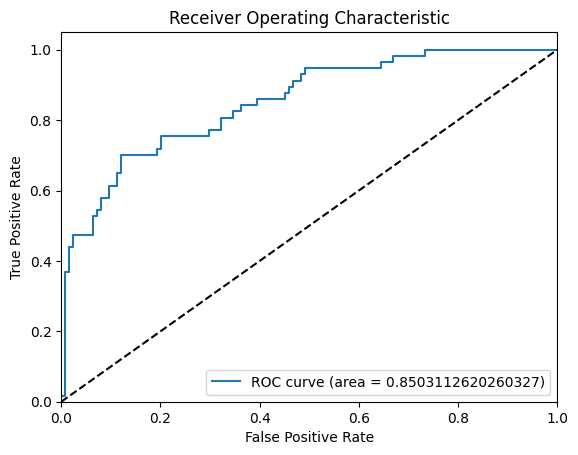

AUC: 0.8503112620260327


In [15]:
auc = plot_roc_and_calculate_auc(df['class'], df['scored.probability'])
print(f"AUC: {auc}")

## Conclusion:

1. The AUC of the ROC curve is 0.85, which is considered to be good performance. This means that the model is able to distinguish between positive and negative classes better than random guessing.

2. The ROC curve is close to the upper left corner, which indicates that the model has a high true positive rate and a low false positive rate. This means that the model is able to correctly identify positive cases without making many mistakes.